In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import random, shuffle
import itertools
from L_svd import L_svd
from numpy.fft import fft, ifft
from scipy.linalg import svd
from mpl_toolkits.mplot3d import Axes3D

# Basic Setup

In [2]:
# make a fully connected graph
size = 40
nodes = [x for x in range(0, size)]
s = (size, size)
mCom = np.ones(s)
g = nx.Graph(mCom)

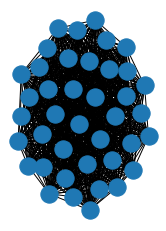

In [3]:
# look at it for fun
plt.subplot(121)
nx.draw(g)

In [4]:
# separate into 2 communities
shuffle(nodes)

first_community = nodes[:int(size/2)]
second_community = list(set(nodes) - set(first_community))

first_community, second_community

([11, 1, 39, 9, 34, 15, 3, 4, 2, 22, 37, 5, 12, 33, 19, 7, 16, 14, 13, 30],
 [0, 6, 8, 10, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 35, 36, 38])

In [5]:
# going to use some python slickness here
connections = [i for i in itertools.combinations_with_replacement(nodes, 2)]

In [6]:
first_community_connections = [i for i in itertools.permutations(first_community, 2)]
second_community_connections = [i for i in itertools.permutations(second_community, 2)]
loops = [(x,x) for x in range(0,size)]

connections = list(set(connections) - set(first_community_connections))
connections = list(set(connections) - set(loops))
illegal_connections = list(set(connections) - set(second_community_connections))


In [7]:
shuffle(illegal_connections)
link = illegal_connections.pop()
illegal_connections = list(set(illegal_connections) - set(link))

testMcom = mCom.copy()
link, testMcom.shape

((22, 20), (40, 40))

In [8]:
results = np.zeros((size, len(illegal_connections), size))

for i, x in enumerate(illegal_connections, start=0):
    testMcom[x[0]][x[1]] = 0
    testMcom[x[1]][x[0]] = 0
    
    #print(results.shape)
    #print(testMcom.shape)
    
    results[:,i,:] = testMcom.copy()

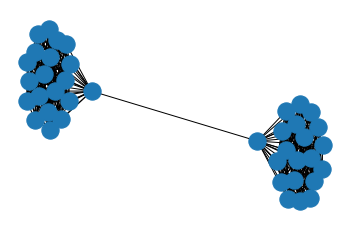

In [9]:
g_draw = nx.Graph(testMcom, with_labels=True, font_weight='bold')
plt.figure()
plt.plot()
nx.draw(g_draw)
plt.show()

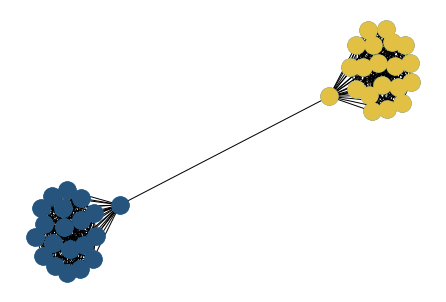

In [10]:
G3 = nx.Graph(testMcom, with_labels=True, font_weight='bold')  

pos = nx.spring_layout(G3)

# Draw the graph, but don't color the nodes
nx.draw(G3, pos)

#For each community list, draw the nodes, giving it a specific color.
nx.draw_networkx_nodes(G3, pos, nodelist=first_community, node_color='#26547C')
nx.draw_networkx_nodes(G3, pos, nodelist=second_community, node_color='#E2C044')
plt.show()

In [11]:
t = np.array(results)
t.shape

(40, 399, 40)

# Tensor Coloring

In [12]:
# file with all converted tensor operations
from tensorOps import *

In [13]:
U, S, V = t_svd(t)

U.shape, S.shape, V.shape

(40, 399, 40)


/home/tim/Documents/research/tensorOps.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:,:,i] = U1
/home/tim/Documents/research/tensorOps.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  V[:,:,i] = np.flip(V1)


((40, 40, 40), (40, 40, 40), (399, 399, 40))

In [18]:
Ul, Sl, Vl = L_svd(t)

Ul.shape, Sl.shape, Vl.shape

(40, 399, 40)


ValueError: could not broadcast input array from shape (40,40) into shape (40,399)

In [14]:
Mt = t_prod(t_tran(U[:,0:3,:]), t)

Mt = np.real(Mt)

Mt.shape

(3, 399, 40)

In [15]:
_, steps, _ = Mt.shape

xMin = None
xMax = None
yMin = None
yMax = None
zMin = None
zMax = None

stepSize = 80

for i in range(0, steps, stepSize):
    G = np.squeeze(Mt[:,i,:])
    
    if xMin is None or min(G[0,:]) < xMin:
        xMin = min(G[0,:])
    if xMax is None or max(G[0,:]) > xMax:
        xMax = max(G[0,:])
        
    if yMin is None or min(G[1,:]) < yMin:
        yMin = min(G[1,:])
    if yMax is None or max(G[1,:]) > yMax:
        yMax = max(G[1,:])
    
    if zMin is None or min(G[2,:]) < zMin:
        zMin = min(G[2,:])
    if zMax is None or max(G[2,:]) > zMax:
        zMax = max(G[2,:])
        
    paddingX = 0.1 #(abs(min(xMin, xMax))) ** (0.01)
    paddingY = 0.1 #(abs(min(yMin, yMax))) ** (0.01)
    paddingZ = 0.1
    
    xMin -= paddingX
    xMax += paddingX
    
    yMin -= paddingY
    yMax += paddingY 
    
    zMin -= paddingZ
    zMax += paddingZ

print("x: {} {} | y: {} {} | z: {} {}".format(xMin, xMax, yMin, yMax, zMin, zMax))

x: -0.9947725139002617 0.8016345366586263 | y: -1.6202124945379226 1.2639707424697788 | z: -0.7925879740863914 1.0103905484079745


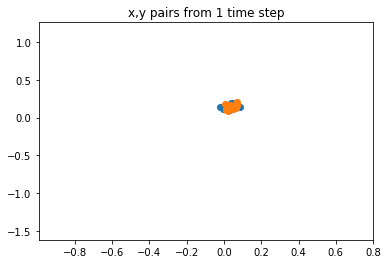

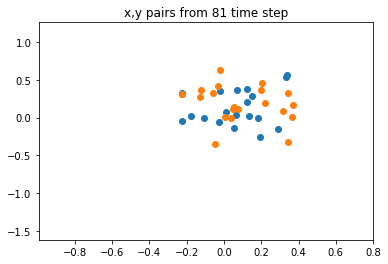

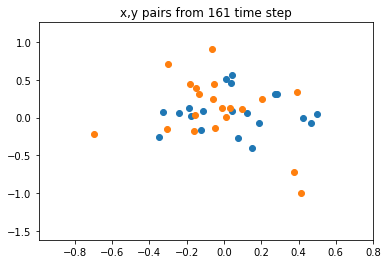

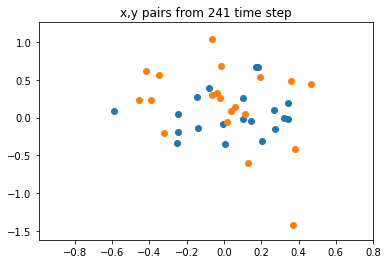

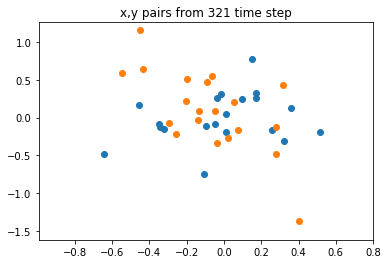

In [16]:
for i in range(0, steps, stepSize):
    G = np.squeeze(Mt[:,i,:])

    com1pointsX = (G[0,:])[first_community]
    com1pointsY = (G[1,:])[first_community]

    com2pointsX = (G[0,:])[second_community]
    com2pointsY = (G[1,:])[second_community]

    plt.scatter(com1pointsX, com1pointsY)
    plt.scatter(com2pointsX, com2pointsY)

    plt.ylim(yMin, yMax)
    plt.xlim(xMin, xMax)
    fname = "h" + str(i).rjust(4, "0")
    plt.title("x,y pairs from {} time step".format(i+1))
    #plt.savefig("colored/2d/" + fname + ".png")
    plt.show()
    plt.close()

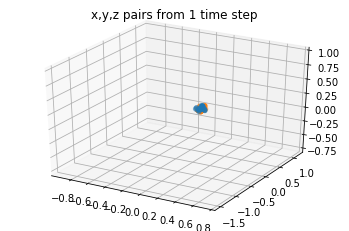

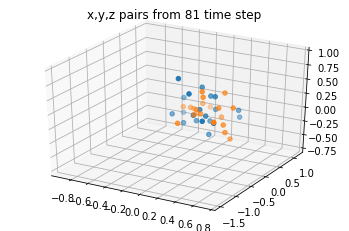

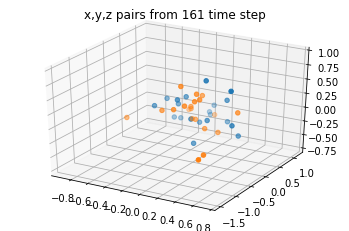

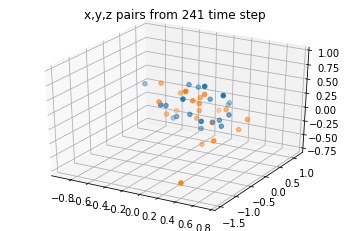

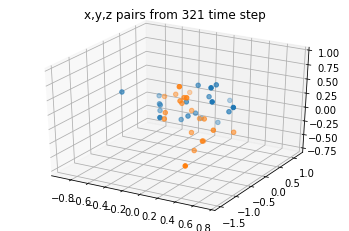

In [17]:
_, steps, _ = Mt.shape

for i in range(0, steps, stepSize):
    G = np.squeeze(Mt[:,i,:])

    com1pointsX = (G[0,:])[first_community]
    com1pointsY = (G[1,:])[first_community]
    com1pointsZ = (G[2,:])[first_community]

    com2pointsX = (G[0,:])[second_community]
    com2pointsY = (G[1,:])[second_community]
    com2pointsZ = (G[2,:])[second_community]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(com1pointsX, com1pointsY, com1pointsZ)
    ax.scatter(com2pointsX, com2pointsY, com2pointsZ)

    plt.ylim(yMin, yMax)
    plt.xlim(xMin, xMax)
    ax.set_zlim(zMin, zMax)
    plt.title("x,y,z pairs from {} time step".format(i+1))
    plt.show()
    fname = "h" + str(i).rjust(4, "0")
    #plt.savefig("colored/3d/" + fname + ".png")
    plt.close()

